[*********************100%***********************]  4 of 4 completed
C:\Users\aless\AppData\Local\Temp\ipykernel_19812\2188345534.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[(t,'Pct Change')] = data[(t, 'Adj Close')].pct_change()
C:\Users\aless\AppData\Local\Temp\ipykernel_19812\2188345534.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data[(t,'Pct Change')] = data[(t, 'Adj Close')].pct_change()
C:\Users\aless\AppData\Local\Temp\ipykernel_19812\2188345534.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future ver

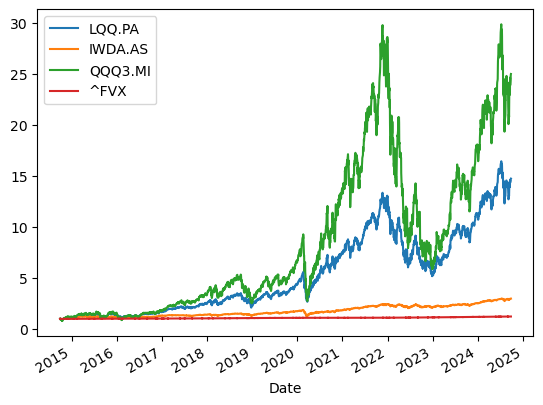

In [366]:
import yfinance as yf
import matplotlib.pyplot as plt

tickers   = ["LQQ.PA", "IWDA.AS", "QQQ3.MI"]
risk_free = ["^FVX"]

trading_days_in_year = 259

data      = yf.download(tickers+risk_free,group_by='Date', start="2014-09-27", end="2024-09-27")
num_years = (data.index[-1]-data.index[0]).days/365
trading_days_in_year = int(len(data.index)/num_years)

# For every ticker in the lists, generate a column of percentual change
for t in tickers:
    data[(t,'Pct Change')] = data[(t, 'Adj Close')].pct_change()
# The tickers in the risk_free list represent percentual changes (differently from the ones in the previous list, that represent values), thus they need to be treated differently
for t in risk_free:
    data[(t, 'Pct Change')] = data[(t,'Adj Close')].div(100*trading_days_in_year)

data.sort_index(axis=1) # Sort indexes after adding columns


# Plot
for t in tickers+risk_free:
    data[(t,'Pct Change')].add(1).cumprod().plot(label=t)

#plt.yscale('log')
plt.legend()
plt.show()

In [382]:
print(f"Period: {num_years:.1f} years")
for t in tickers:
    print(f"Ticker: {t}")
    excess_returns      = (data[(t, 'Adj Close')].iloc[-1]/data[(t, 'Adj Close')].iloc[0])**(1/num_years)-1
    standard_deviation  = data[(t, 'Pct Change')].std() * (trading_days_in_year**0.5)
    sharpe_ratio        = excess_returns / standard_deviation
    currmax = maximum_drowdown= 0
    for i in range(len(value)):
        currmax = max(currmax, data[(t, 'Adj Close')].iloc[i])
        maximum_drowdown = min(maximum_drowdown, (data[(t, 'Adj Close')].iloc[i]-currmax)/currmax)
    print(f"    Excess return      = {excess_returns:.2f}")
    print(f"    Maximum drowdown   = {100*maximum_drowdown:.2f}%")
    print(f"    Standard deviation = {100*standard_deviation:.2f}%")
    print(f"    Sharpe ratio       = {sharpe_ratio:.2f}")
    print("-------")

Period: 10.0 years
Ticker: LQQ.PA
    Excess return      = 0.31
    Maximum drowdown   = -61.21%
    Standard deviation = 39.65%
    Sharpe ratio       = 0.78
-------
Ticker: IWDA.AS
    Excess return      = 0.12
    Maximum drowdown   = -33.63%
    Standard deviation = 16.18%
    Sharpe ratio       = 0.71
-------
Ticker: QQQ3.MI
    Excess return      = 0.38
    Maximum drowdown   = -80.30%
    Standard deviation = 59.36%
    Sharpe ratio       = 0.64
-------


In [377]:
data[(t,'Pct Change')].add(1).cumprod().rolling().max()

TypeError: NDFrame.rolling() missing 1 required positional argument: 'window'

In [160]:
(data['Daily Change'].std() * (255**0.5))

0.42328863631521485

In [345]:
(data.index[-1]-data.index[0]).days/365

3.0

In [204]:
data = yf.download(["LQQ.PA", "CNDX.AS"],group_by='Date', start="2021-09-27", end="2024-09-27")

[*********************100%***********************]  2 of 2 completed


In [203]:
data.stack(level=0)

C:\Users\aless\AppData\Local\Temp\ipykernel_19812\983712724.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data.stack(level=0)


Price                                     Open         High          Low  \
Date                      Ticker                                           
2021-09-27 00:00:00+00:00 CNDX.AS   741.400024   741.900024   729.900024   
                          LQQ.PA    814.799988   815.000000   786.599976   
2021-09-28 00:00:00+00:00 CNDX.AS   728.500000   730.000000   715.400024   
                          LQQ.PA    784.700012   787.000000   754.900024   
2021-09-29 00:00:00+00:00 CNDX.AS   718.500000   724.000000   718.500000   
...                                        ...          ...          ...   
2024-09-24 00:00:00+00:00 LQQ.PA   1084.000000  1086.800049  1061.199951   
2024-09-25 00:00:00+00:00 CNDX.AS  1014.000000  1024.199951  1013.599976   
                          LQQ.PA   1070.800049  1092.400024  1070.000000   
2024-09-26 00:00:00+00:00 CNDX.AS  1036.800049  1042.000000  1022.200012   
                          LQQ.PA   1115.599976  1125.599976  1085.400024   

Price                                    Close    Adj Close  Volume  
Date                      Ticker                                     
2021-09-27 00:00:00+00:00 CNDX.AS   732.700012   732.700012    1886  
                          LQQ.PA    795.000000   795.000000    6276  
2021-09-28 00:00:00+00:00 CNDX.AS   715.799988   715.799988    3272  
                          LQQ.PA    757.000000   757.000000    5770  
2021-09-29 00:00:00+00:00 CNDX.AS   720.099976   720.099976    1926  
...                                        ...          ...     ...  
2024-09-24 00:00:00+00:00 LQQ.PA   1079.400024  1079.400024    3814  
2024-09-25 00:00:00+00:00 CNDX.AS  1023.400024  1023.400024    1434  
                          LQQ.PA   1088.199951  1088.199951    2574  
2024-09-26 00:00:00+00:00 CNDX.AS  1024.599976  1024.599976    2265  
                          LQQ.PA   1089.599976  1089.599976    5657  

[1544 rows x 6 columns]

In [271]:
data.head()

Ticker                         LQQ.PA                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2016-09-27 00:00:00+00:00  112.855003  113.644997  111.974998  113.644997   
2016-09-28 00:00:00+00:00  114.459999  114.699997  113.620003  113.620003   
2016-09-29 00:00:00+00:00  114.510002  114.900002  113.059998  113.105003   
2016-09-30 00:00:00+00:00  112.419998  114.440002  112.389999  114.410004   
2016-10-03 00:00:00+00:00  114.120003  114.300003  113.550003  113.845001   

Ticker                                             CNDX.AS              \
Price                       Adj Close   Volume        Open        High   
Date                                                                     
2016-09-27 00:00:00+00:00  113.644997   1007.0  237.039993  238.389999   
2016-09-28 00:00:00+00:00  113.620003   4987.0  239.309998  239.794998   
2016-09-29 00:00:00+00:00  113.105003   4734.0  239.054993  239.054993   
2016-09-30 00:00:00+00:00  114.410004   1571.0  236.884995  238.699997   
2016-10-03 00:00:00+00:00  113.845001  25675.0  238.529999  238.869995   

Ticker                                             ...          ^FVX         \
Price                             Low       Close  ... Volume   Open   High   
Date                                               ...                        
2016-09-27 00:00:00+00:00  235.990005  238.389999  ...  147.0  1.105  1.122   
2016-09-28 00:00:00+00:00  238.350006  238.350006  ...   27.0  1.135  1.138   
2016-09-29 00:00:00+00:00  237.320007  237.320007  ...  101.0  1.140  1.157   
2016-09-30 00:00:00+00:00  236.884995  238.699997  ...   29.0  1.106  1.161   
2016-10-03 00:00:00+00:00  238.404999  238.500000  ...  503.0  1.159  1.187   

Ticker                                                       LQQ.PA  \
Price                        Low  Close Adj Close Volume Pct Change   
Date                                                                  
2016-09-27 00:00:00+00:00  1.092  1.112     1.112    0.0        NaN   
2016-09-28 00:00:00+00:00  1.111  1.130     1.130    0.0   0.999780   
2016-09-29 00:00:00+00:00  1.104  1.115     1.115    0.0   0.995467   
2016-09-30 00:00:00+00:00  1.099  1.156     1.156    0.0   1.011538   
2016-10-03 00:00:00+00:00  1.157  1.183     1.183    0.0   0.995062   

Ticker                       CNDX.AS       ^FVX  
Price                     Pct Change Pct Change  
Date                                             
2016-09-27 00:00:00+00:00        NaN   1.000044  
2016-09-28 00:00:00+00:00   0.999832   1.000044  
2016-09-29 00:00:00+00:00   0.995679   1.000044  
2016-09-30 00:00:00+00:00   1.005815   1.000045  
2016-10-03 00:00:00+00:00   0.999162   1.000046  

[5 rows x 21 columns]